# Notebook to analize Non-Stationary GEV with covariates and trends for Monthly Maxima

In [1]:
from GEVnonstat_v2.Automatic_GEV_fit_v2_1 import GEVnonstat
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

## Import Data

In [2]:
data_path = "Datos\\Hs_SS_PCs_Cantabria.txt"
data = pd.read_table(f"{data_path}")

In [3]:
# Columns for the Hs dataframe
cols_first = ['yyyy', 'mm', 'dd', 'Hs'] + [col for col in data.columns if col.startswith('PC') and not col.endswith('_SS')]

# Columns for the Surge dataframe
cols_second = ['yyyy', 'mm', 'dd', 'Surge'] + [col for col in data.columns if col.endswith('_SS')]

# Create the two DataFrames
df_hs = data[cols_first]
df_surge = data[cols_second]

Select the monthly maxima in both datasets.

In [ ]:
idxHs = df_hs.groupby(['yyyy', 'mm'])['Hs'].idxmax()
mm_Hs = df_hs.loc[idxHs].reset_index(drop=True)
# mm_Hs
idxSurge = df_surge.groupby(['yyyy', 'mm'])['Surge'].idxmax()
mm_Surge = df_surge.loc[idxHs].reset_index(drop=True)
# mm_Surge

In [6]:
days_in_month = {1: 31, 2: 28.25, 3: 31, 4: 30, 5: 31, 6: 30, 7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31}
mm_Hs['time'] = mm_Hs['yyyy']-np.min(mm_Hs['yyyy']) + (mm_Hs['mm']-1) / 12 + mm_Hs['dd'] / mm_Hs['mm'].map(days_in_month) / 12
mm_Surge['time'] = mm_Surge['yyyy']-np.min(mm_Surge['yyyy']) + (mm_Surge['mm']-1) / 12 + mm_Surge['dd'] / mm_Surge['mm'].map(days_in_month) / 12
Hsdata = mm_Hs.drop(columns=["yyyy", "mm", "dd"])
Surgedata = mm_Surge.drop(columns=["yyyy", "mm", "dd"])

## Fitting the Non Stationary GEV for Hs

In [7]:
hsmax = Hsdata.to_numpy()[:,0]
time = Hsdata.to_numpy()[:,-1]
covariates = {col: Hsdata[col] for col in Hsdata.columns[1:-1]}

covariates_df = pd.DataFrame(covariates)
scaler = StandardScaler()
scaled_covariates_df = pd.DataFrame(
    scaler.fit_transform(covariates_df), 
    columns=covariates_df.columns
)
scaled_covariates = scaled_covariates_df.to_dict(orient='list')

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
autogev_hs2 = GEVnonstat(xt=hsmax,t=time,kt=None,covariates=scaled_covariates,example="Hs Monthly",trends=True, harm=True)
beta0,beta,alpha0,alpha,gamma0,gamma,betaT,auxvarphi_loc,list_loc,betaT2,auxvarphi_sc,list_sc,auxvarphi_sh,list_sh,loglikeobj,grad,hessian,popt,stdpara = autogev_hs2.AutoAdjust()

Starting the Harmonic iterative process


  4%|▍         | 4/100 [03:53<1:33:34, 58.49s/it]


End of the Harmonic iterative process
Harmonic GEV AIC: 1454.4319470071273 

Starting the Covariates iterative process


Covariate Iteration:   3%|▎         | 10/300 [01:08<33:05,  6.85s/it]  


End of the Covariates iterative process
Covariates AIC: 891.6346838636407 

Starting trends process
Location trend parameter not significant
Adding trend term to scale parameter
Scale trend AIC:  891.2821885346192


In [12]:
print("Location parameter (mu)")
print("beta0",beta0)
print("beta",beta)
print("betaT",betaT)
print("varphi",auxvarphi_loc)
print("--------------------------")
print("Scale parameter (sigma)")
print("alpha0",alpha0)
print("alpha",alpha)
print("betaT2",betaT2)
print("varphi2",auxvarphi_sc)
print("--------------------------")
print("Shape parameter (xi)")
print("gamma0",gamma0)
print("gamma",gamma)
print("varphi3", auxvarphi_sh)

Location parameter (mu)
beta0 4.110776583345165
beta [0.7718179  0.20694274]
betaT None
varphi [ 0.39096006 -0.3357752  -0.18823436  0.30203643  0.25101829 -0.34794688
  0.23980212  0.21829961  0.16559111 -0.34467343]
--------------------------
Scale parameter (sigma)
alpha0 -0.48316923319717586
alpha [ 0.3761871   0.07698012 -0.03251836 -0.01357139]
betaT2 -0.004253848823664841
varphi2 []
--------------------------
Shape parameter (xi)
gamma0 -0.21314952873460538
gamma None
varphi3 []


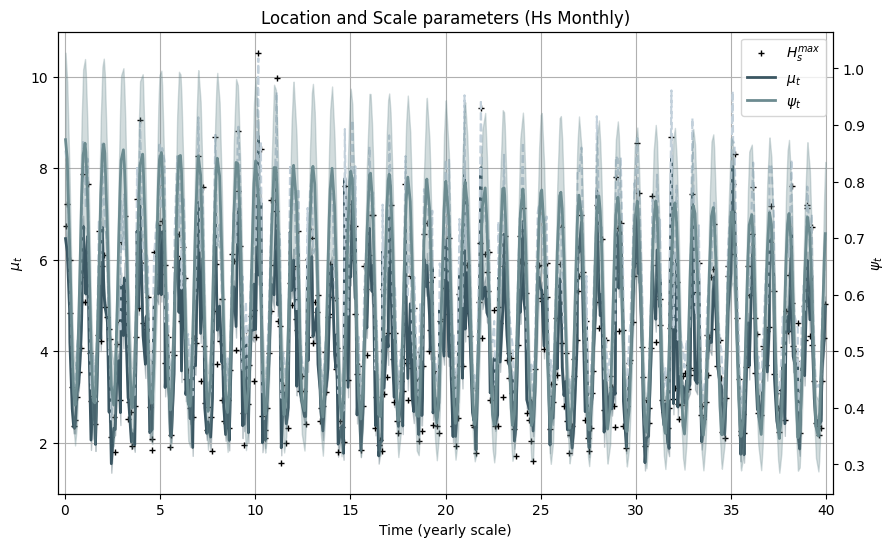

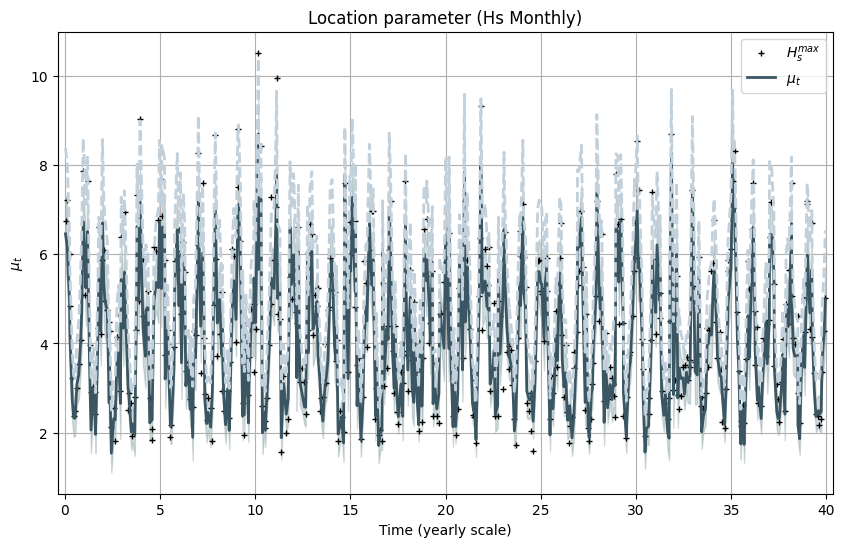

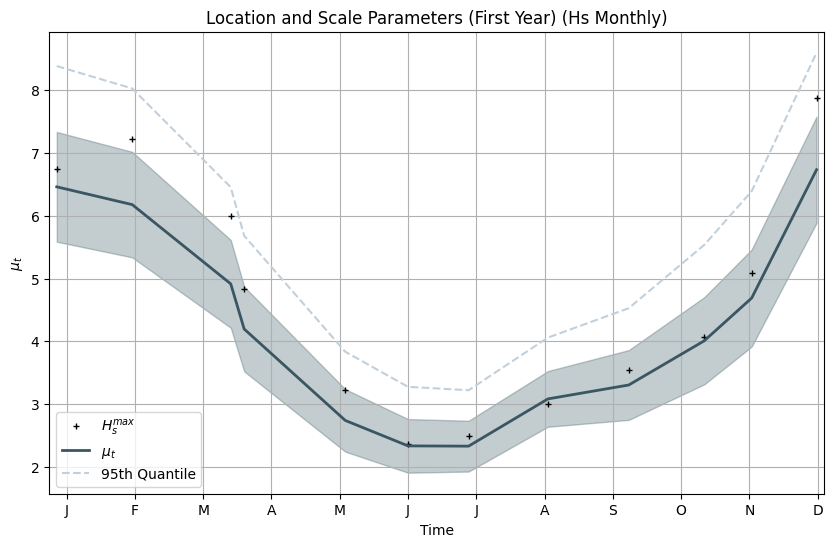

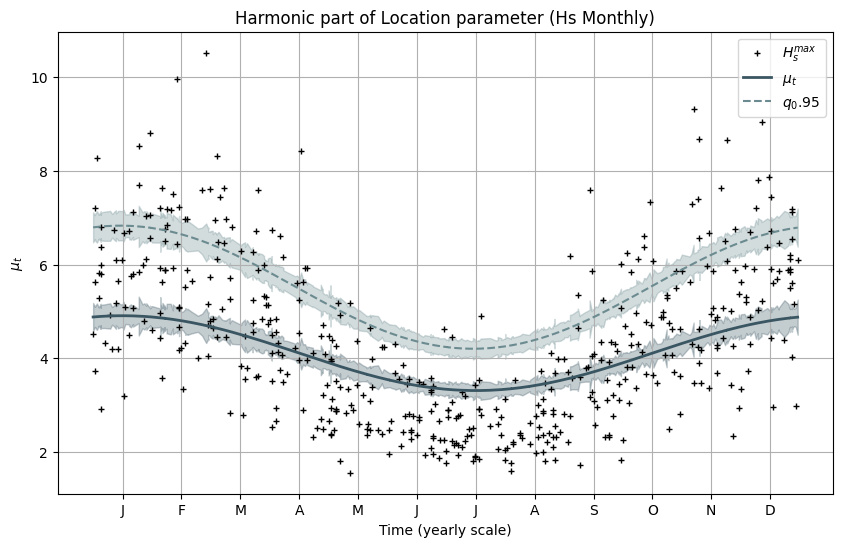

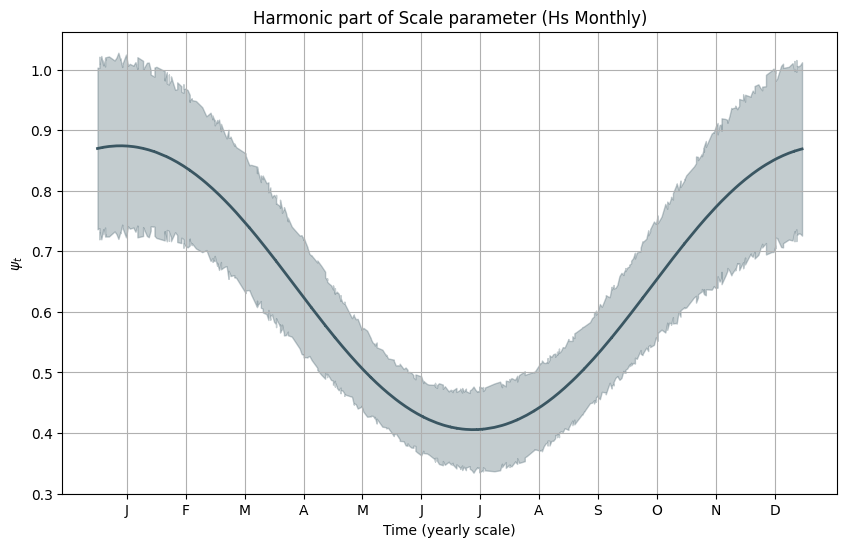

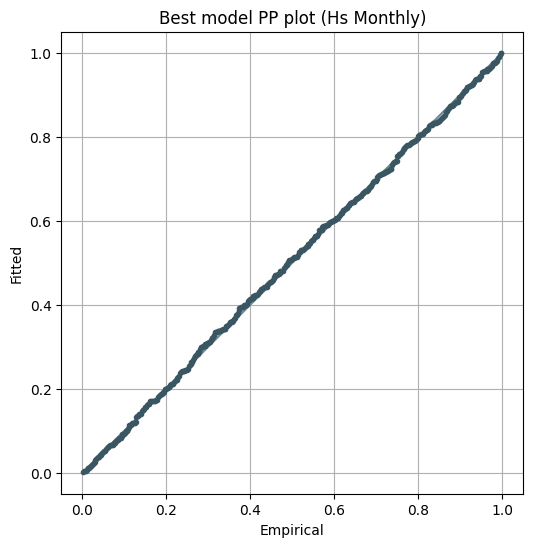

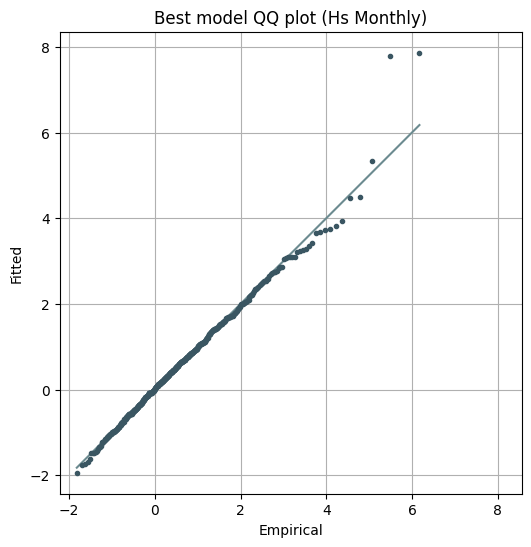

In [11]:
autogev_hs2.plot()